<a id='back'></a>
# [Table of contents]

* [Intro](#intro)
* [Stage 1. Data Initialization](#step1)
     * [1.1 Loading Data](#step1.1)
* [Stage 2. Preparing Data](#step2)
     * [2.1 Prepaid Plan](#step2.1)
         * [2.1.1 Data Repair](#step2.1.1)
         * [2.1.2 Enriching Data Quality](#step2.1.2)
     * [2.2 User](#step2.2)
         * [2.2.1 Data Repair](#step2.2.1)
         * [2.2.2 Enriching Data Quality](#step2.2.2)
     * [2.3 Call](#step2.3)
         * [2.3.1 Fixing Data](#step2.3.1)
         * [2.3.2 Enriching Data Quality](#step2.3.2)
     * [2.4 Message/SMS](#step2.4)
         * [2.4.1 Data Repair](#step2.4.1)
         * [2.4.2 Enriching Data Quality](#step2.4.2)
     * [2.5 Internet](#step2.5)
         * [2.5.1 Fixing Data](#step2.5.1)
         * [2.5.2 Enriching Data Quality](#step2.5.2)
* [Stage 3. Process of Analyzing Data](#step3)
     * [3.1 Studying the Terms and Conditions Regarding Prepaid Packages](#step3.1)
     * [3.2 Aggregating Data per User](#step3.2)
     * [3.3 Studying User Behavior](#step3.3)
         * [3.3.1 Call](#step3.3.1)
         * [3.3.2 Message/SMS](#step3.3.2)
         * [3.3.3 Internet](#step3.3.3)
         * [3.3.4 Income](#step3.3.4)
* [Stage 4. Hypothesis Testing](#step4)
* [Stage 5. General Conclusion](#step5)

<a id='intro'></a>
# **Introduction**
<br>Every time we carry out an analysis, we need to formulate several hypotheses that we need to test further. Sometimes, the tests we carry out lead us to accept the hypothesis. But at other times, we also need to reject it. To make the right decisions in business, we must understand whether the assumptions we make are correct or not.

**Project Description**
<br>In this project, you work as an analyst at a telecommunications operator company called Megaline. The company offers its clients two types of prepaid plans, namely the Surf plan and the Ultimate plan. The advertising department wants to know which prepaid plan generates more revenue, so they can create an advertising budget accordingly.

You will conduct an initial analysis of the prepaid plans based on a relatively small sample of clients. You have 500 Megaline client data, which contains information such as: who they are, where they come from, what type of package they use, and the number of calls and messages they sent in 2018. Your task is to analyze the behavior of the users, then determine the package Which prepaid is more profitable?

**Prepaid Package Description**
<br>Note: Megaline rounds seconds to minutes and megabytes to gigabytes. For calls, each individual call is rounded up: even if a call lasts only one second, it will count as one minute. For web traffic, each individual web session is not rounded up. However, totals for a month are rounded up. If a user spends 1025 megabytes this month, he or she will also be charged for 2 gigabytes.

|Surf | Ultimate |
|:----------|:----------|
|Monthly fee: &dollar;20 | Monthly fee: &dollar;70 |
|500 minutes of call duration per month, 50 SMS, and 15 GB data | 3000 minutes of call duration per month, 1000 SMS, and 30 GB data |
|After exceeding the package limit, you will be charged: | After exceeding the package limit, you will be charged: |
|1 minute: 3 cents | 1 minute: 1 cent |
|1 SMS: 3 cents | 1 SMS: 1 cent |
|1 GB data: &dollar;10 | 1 GB data: &dollar;7 |


**Objective**
<br>Testing a hypothesis:
1. The average income of Ultimate and Surf phone plan users is different.
2. The average income of users in the NY-NJ area is different from the income of users from other areas.
<br>You can determine how large the "alpha" value will be used.
<br>Explain:
<br>1. How do you formulate the null hypothesis and alternative hypothesis.
<br>2. What criteria did you use to test your hypothesis and why did you use them?

[Back to Content](#back)

<a id='step1'></a>
# **Step 1. Data Initialization**

In [1]:
# Load all libraries
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


<a id='step1.1'></a>
## **1.1 Loading Data**

In [2]:
# Load data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


[Back to Content](#back)

<a id='step2'></a>
# **Step 2. Preparing Data**

<a id='step2.1'></a>
## **2.1 Prepaid Plan**

In [3]:
# Display general information/summary about DataFrame prepaid packages
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Show sample data for the packages
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [6]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [7]:
plans.duplicated().sum()

0

In [8]:
plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [9]:
plans.shape

(2, 8)

<br>The data shown is the output of plans.info() in Python using pandas, which provides information about a DataFrame called "plans". Let's explain the information contained in this output:

<br>RangeIndex:
<br>It shows information about the index of the DataFrame. RangeIndex includes the number of entries (2 entries in this case) and the index range (from 0 to 1).

<br>Data columns:
<br>Provides information about the total columns (8 columns in this case).

<br>Columns:
<br>messages_included: Shows the number of messages included in the package.
<br>mb_per_month_included: The number of megabytes included in the plan per month.
<br>minutes_included: Shows the number of minutes included in the package.
<br>usd_monthly_pay: Monthly cost in USD for the plan.
<br>usd_per_gb: Additional charge per gigabyte outside the plan.
<br>usd_per_message: Additional charge per message outside the package in USD.
<br>usd_per_minute: Additional charges per minute outside the plan in USD.
<br>plan_name: Plan name.

<br>Non-Null Count:
<br>Indicates the number of non-null (non-empty) entries in each column. All columns have 2 non-null entries, which means there are no missing values.

<br>Dtype:
<br>int64: Indicates the column data type that contains integers.
<br>float64: Indicates the column data type that contains fractional numbers (float).
<br>object: Indicates the data type of the column that contains the object, such as a string (in this case, the plan_name column).
    
<br>Memory Usage:
<br>Shows memory usage by the DataFrame, in bytes (256.0+ bytes in this case).

<br>The output shown is the result of plans.head() where we can see the first five rows of the DataFrame "plans". Let's explain each column and row:

<br>messages_included: Shows the number of messages included in the package for each plan. The “surf” plan has a 50 message plan, while the “ultimate” plan has a 1000 message plan.

<br>mb_per_month_included: Shows the number of megabytes included in the plan per month for each plan. The “surf” plan has a 15,360 MB plan, while the “ultimate” plan has a 30,720 MB plan.

<br>minutes_included: Shows the number of minutes included in the package for each plan. The “surf” plan has a 500 minute plan, while the “ultimate” plan has a 3000 minute plan.

<br>usd_monthly_pay: This is the monthly fee in USD for each package type.

<br>usd_per_gb: This is an additional cost per gigabyte outside the package. The "surf" plan has a surcharge of &dollar;10 per gigabyte, while the "ultimate" plan has an additional charge of &dollar;7 per gigabyte.

<br>usd_per_message: This is an additional charge per message outside the package in USD.

<br>usd_per_minute: This is the additional cost per minute outside the package in USD.

<br>plan_name: Is the name of the package. There are two plans: "surf" and "ultimate".

<br>Each row represents one plan with the corresponding values for each category described above. The “surf” plan is the first line and the “ultimate” plan is the second line.

<a id='step2.1.1'></a>
### **2.1.1 Fixing Data**

In [10]:
# Convert the value to gigabytes by dividing by 1024
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024



<br>The code shown is an attempt to convert the values in the 'mb_per_month_included' column to gigabytes (GB) by dividing by 1024. Let's explain what happens in the code:

<br>plans['gb_per_month_included'] = plans['mb_per_month_included']/1024:
<br>This code adds a new column named 'gb_per_month_included' to DataFrame 'plans'. This column is filled with the result of dividing the value in the 'mb_per_month_included' column by 1024, which is the conversion from megabytes (MB) to gigabytes (GB).

<br>plans['mb_per_month_included']: Gets the value from the 'mb_per_month_included' column, namely the number of megabytes per month for each plan.

<br>plans['mb_per_month_included']/1024: Divide the 'mb_per_month_included' value by 1024 to convert it to gigabytes (1 gigabyte = 1024 megabytes).

<br>The results of this division are stored in a new column 'gb_per_month_included'.

<br>The result of this operation is the addition of the 'gb_per_month_included' column which contains a value in gigabytes (GB) which is equivalent to the value in megabytes (MB) from the 'mb_per_month_included' column, but in gigabytes.

In [11]:
# Check information changes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 276.0+ bytes


In [12]:
# Show sample data
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


[Back to Content](#back)

<a id='step2.1.2'></a>
### **2.1.2 Enriching Data Quality**

<a id='step2.2'></a>
## **2.2 Users**

In [13]:
# Show general information/summary about the user's DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
# Show sample user data
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [16]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [17]:
users.duplicated().sum()

0

In [18]:
users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [19]:
users.shape

(500, 8)

<br>Based on the information above, the following is an analysis related to potential problems in DataFrame users and suggestions for improvements:

1. Column Data Type reg_date and churn_date:
<br>Problem: The reg_date and churn_date columns currently have a string (object) data type which should be converted to a datetime data type to facilitate date analysis.
<br>Fix: Convert reg_date and churn_date columns to datetime data type using pd.to_datetime.

    
2. Churn_date Column with Missing Data (NaN):
<br>Problem: There are many empty values (NaN) in the churn_date column. This may indicate that most users are still using the service (haven't churned) or that the data is not being recorded correctly.
<br>Improvement: If this column must have valid data, then it is necessary to ensure that this data is filled in on December 1 2018, namely the date of the service package being used when this data was created.
    
    
3. Plan column
<br>Problem: There are only 2 types, namely 'surf' and 'ultimate'
<br>Improvement: Changed the data type to category
    
    
4. No Duplicate Data:
<br>Problem: There are no duplicate data in the DataFrame, which is good.
<br>Fix: No further action is required for this issue.

<a id='step2.2.1'></a>
### **2.2.1 Fixing Data**

In [20]:
# Convert 'plan' column to category type
users['plan'] = users['plan'].astype('category')

In [21]:
# Convert 'reg_date' column to datetime data type
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [22]:
# Replace the NaN value with the date December 01, 2018,
# The service plan was in use when this data was generated
users['churn_date'].fillna('2018-12-01', inplace=True)

# Convert column 'churn_date' to datetime data type
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [23]:
# Check information changes
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  500 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


<br>The code shown is a series of steps to perform data transformation and cleaning on DataFrame users. Let's explain each step:

<br>Convert 'plan' Column to Category Type:
<br>Purpose: Change the data type of the 'plan' column to a category type, which is memory efficient and useful if this column has a limited number of unique values, namely 'surf' and 'ultimate'.
<br>Implementation: Using .astype('category') to perform data type conversion.

<br>Convert Column 'reg_date' to DateTime Data Type:
<br>Purpose: Change the data type of column 'reg_date' to datetime data type to enable date-based analysis.
<br>Implementation: Using pd.to_datetime to perform data type conversion.

<br>Filling in NaN Values in the 'churn_date' Column:
<br>Purpose: Replace the NaN value in the 'churn_date' column with a specific date to indicate that the service package was still in use when the data was recorded.
<br>Implementation: Use .fillna() with the last subscription date ('2018-12-01' in this case) to fill in NaN values.
    
<br>Convert Column 'churn_date' to DateTime Data Type:
<br>Purpose: Change the data type of column 'churn_date' to datetime data type after filling in NaN values.
<br>Implementation: Using pd.to_datetime to perform data type conversion.
    
<br>DataFrame Information Checking:
<br>Purpose: Check data type changes and non-null values after data transformation and cleaning.
<br>Implementation: Using users.info() to get information about the data type and number of non-null values in each column.
    
<br>The final result after transformation and cleaning is a DataFrame users with changes to the appropriate data types, especially the 'plan', 'reg_date', and 'churn_date' columns, as well as filling in NaN values in the 'churn_date' column according to the specified date.

<a id='step2.2.2'></a>
### **2.2.2 Enriching Data Quality**

In [24]:
# Save the month names taken from 'reg_date' into a new column 'reg_month'
users['reg_month'] = users['reg_date'].dt.month_name()

# Returns unique values
users['reg_month'].unique()

array(['December', 'August', 'October', 'January', 'May', 'November',
       'July', 'April', 'March', 'June', 'February', 'September'],
      dtype=object)

<br>The code shown is to create a new column 'reg_month' which contains the names of months taken from the 'reg_date' column, then displays the unique values from the 'reg_month' column. The following is an explanation of the steps:

<br>Create a New Column 'reg_month':
<br>Use users['reg_date'].dt.month_name() to take the month name from the 'reg_date' column and store it in a new 'reg_month' column.
<br>The dt.month_name() function is used to retrieve the month name from each date in text format, such as "January", "February", etc.


<br>Displaying Unique Values from Column 'reg_month':
<br>Use users['reg_month'].unique() to get the unique value from the 'reg_month' column, which contains the month names from the previous step.
    
    
<br>The end result is that we get a unique list of month names that appear in the 'reg_month' column. This list is the result of retrieving the month names from the 'reg_date' column for each entry in the 'users' DataFrame. These values are the names of the months that appear in the user's registration data ('reg_date').

In [25]:
# Save the month names taken from 'churn_date' into a new column 'churn_month'
users['churn_month'] = users['churn_date'].dt.month_name()

# Returns unique values
users['churn_month'].unique()

array(['December', 'November', 'September', 'October', 'July', 'August'],
      dtype=object)

<br>The code shown is to create a new column 'churn_month' which contains the names of months taken from the 'churn_date' column, then displays the unique values from the 'churn_month' column. The following is an explanation of the steps:

<br>Create a New Column 'churn_month':
<br>Use users['churn_date'].dt.month_name() to take the month name from the 'churn_date' column and store it in a new column 'churn_month'.
<br>The dt.month_name() function is used to retrieve the month name from each date in text format, such as "January", "February", etc.
    
    
<br>Displaying Unique Values from Column 'churn_month':
<br>Use users['churn_month'].unique() to get the unique value from the 'churn_month' column, which contains the month names from the previous step.
    
    
<br>The end result is that we get a unique list of month names that appear in the 'churn_month' column. This list is the result of retrieving the month names from the 'churn_date' column for each entry in the 'users' DataFrame. These values are the names of the months that appear in the service churn data ('churn_date').

In [26]:
# Check information changes
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    category      
 7   churn_date   500 non-null    datetime64[ns]
 8   reg_month    500 non-null    object        
 9   churn_month  500 non-null    object        
dtypes: category(1), datetime64[ns](2), int64(2), object(5)
memory usage: 35.9+ KB


In [27]:
# Check for data sample changes
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-01,December,December
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-01,August,December
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-01,October,December
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-01,January,December
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-01,May,December


[Back to Content](#back)

<a id='step2.3'></a>
## **2.3 Call**

In [28]:
# Show general information/summary about the calling DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [29]:
# Show sample data containing calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [30]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [31]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [32]:
calls.duplicated().sum()

0

In [33]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [34]:
calls.shape

(137735, 4)

<br>Information related to DataFrame calls. Here is a detailed explanation:

<br>General Information DataFrame calls:
<br>RangeIndex: This DataFrame has 137,735 entries (rows) and a RangeIndex from 0 to 137,734.
<br>There are 4 columns in this DataFrame.

    
<br>Columns Data:
<br>id: Saves the call ID.
<br>user_id: Stores the ID of the user who made the call.
<br>call_date: Stores the call date.
<br>duration: Stores the call duration in minutes.
    
    
<br>Column Data Type:
<br>id: Object data type (string), which is appropriate because it contains an ID.
<br>user_id: Integer data type (int64), which is appropriate because it contains the user ID.
<br>call_date: Object data type (string), should be changed to datetime data type to facilitate date-based analysis.
<br>duration: Float data type (float64), which is appropriate because it contains the call duration in minutes.

    
<br>Description of Numerical Column Statistics:
<br>user_id: Descriptive statistics for the user_id column.
<br>duration: Descriptive statistics for the duration column.

    
<br>Missing Values:
<br>There are no missing values (NaN) in this DataFrame.

    
<br>Duplicate Data:
<br>There is no duplicate data in this DataFrame.

    
<br>In summary, DataFrame calls look pretty clean and have no missing or duplicate values. However, it would be better if the call_date column was changed to the datetime data type to facilitate date-based analysis.

<a id='step2.3.1'></a>
### **2.3.1 Fixing Data**

In [35]:
# Rounds the value up and then converts it to an integer
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

# Convert data type 'call_date' to 'datetime64[ns]'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

<br>The code shown is to perform two processes on DataFrame calls: rounding up on the 'duration' column and data type conversion on the 'call_date' column. The following is an explanation of the steps:

    
<br>Call Duration Rounding Up and Converting to Integer:
<br>calls['duration'].apply(np.ceil): Use the apply function to apply the np.ceil (ceil = ceiling) function to the 'duration' column. This function rounds each call duration value up (for example, from 5.2 to 6.0).
<br>.astype('int'): Changes the rounded data type to integer data type (int).
<br>The goal of this step is to convert the call duration from a float data type (for example, 5.2) to an integer (for example, 6), which is more suitable for representing call duration in minutes.

    
<br>Column Data Type Conversion 'call_date':
<br>calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d'): Using pd.to_datetime to convert column data type 'call_date' to data type datetime (datetime64[ns]). The format='%Y-%m-%d' parameter is used to determine the appropriate date format for the 'call_date' column.

    
<br>The goal of this step is to ensure that the 'call_date' column has the datetime data type, which makes it easier to perform date-based analysis and manipulation.

    
<br>The final result is a DataFrame calls that has undergone two changes: the call duration has been rounded up and changed to an integer data type, and the 'call_date' column has been changed to a datetime data type. These two changes improve the consistency and ease of processing data in a DataFrame.

<a id='step2.3.2'></a>
### **2.3.2 Enriching Data Quality**

In [36]:
# Extracts the month name from the 'call_date' column and saves it to the 'call_month' column
calls['call_month'] = calls['call_date'].dt.month_name()

# Returns unique values
calls['call_month'].unique()

array(['December', 'September', 'October', 'November', 'August', 'July',
       'June', 'May', 'March', 'April', 'February', 'January'],
      dtype=object)

<br>The code shown is to extract the month name from the 'call_date' column and store it in a new column 'call_month'. The following is an explanation of the steps:

<br>Extracting Month Names from 'call_date' Column:
<br>calls['call_date'].dt.month_name(): Uses .dt.month_name() to retrieve the month name of each date in the 'call_date' column. This function will return the names of the months in text format (e.g., "January", "February", etc.).

    
<br>Saving Results to New Column 'call_month':
<br>calls['call_month'] = ...: The results of the month name extraction above are stored in a new column 'call_month'.

    
<br>Displaying Unique Values from Column 'call_month':
<br>calls['call_month'].unique(): Uses .unique() to get unique values from the 'call_month' column.

    
<br>The final result is that we get a unique list of month names that appear in the 'call_date' column, which has been extracted and stored in the 'call_month' column. This allows us to see the different months in which calls were made.

In [37]:
# Check information changes
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  int32         
 4   call_month  137735 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 4.7+ MB


In [38]:
# Check for data sample changes
calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December


[Back to Content](#back)

<a id='step2.4'></a>
## **2.4 Message/SMS**

In [39]:
# Display general information/summary about SMS DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [40]:
# Show sample data for SMS
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [41]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [42]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [43]:
messages.duplicated().sum()

0

In [44]:
messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [45]:
messages.shape

(76051, 3)

<br>The following is an explanation of DataFrame messages based on the information above:

    
<br>General Information DataFrame messages:
<br>RangeIndex: This DataFrame has 76,051 entries (rows) and a RangeIndex from 0 to 76,050.
<br>There are 3 columns in this DataFrame.

    
<br>Columns Data:
<br>id: Stores the message ID.
<br>user_id: Stores the ID of the user who sent the message.
<br>message_date: Stores the date the message was sent.

    
<br>Column Data Type:
<br>id: Object data type (string), which is appropriate because it contains an ID.
<br>user_id: Integer data type (int64), which is appropriate because it contains the user ID.
<br>message_date: Object data type (string), should be changed to datetime data type to facilitate date-based analysis.

    
<br>Description of Numerical Column Statistics:
<br>user_id: Descriptive statistics for the user_id column.

    
<br>Missing Values:
<br>There are no missing values (NaN) in this DataFrame.

    
<br>Duplicate Data:
<br>There is no duplicate data in this DataFrame.

    
<br>In summary, the DataFrame messages look pretty clean and have no missing or duplicate values. However, it would be better if the message_date column was changed to the datetime data type to facilitate date-based analysis.

<a id='step2.4.1'></a>
### **2.4.1 Fixing Data**

In [46]:
# Convert message_date data type to 'datetime64[ns]'
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

<br>The code shown is to convert the data type of the 'message_date' column in the messages DataFrame to the datetime data type (datetime64[ns]). The following is an explanation of the steps:

    
<br>Column Data Type Conversion 'message_date':
<br>pd.to_datetime(messages['message_date'], format='%Y-%m-%d'): Use pd.to_datetime to convert column data type 'message_date' to datetime data type (datetime64[ns]) . The format='%Y-%m-%d' parameter is used to determine the appropriate date format for the 'message_date' column.

    
<br>The goal of this step is to ensure that the 'message_date' column has the datetime data type, which makes it easier to perform date-based analysis and manipulation.


<br>The final result is a DataFrame messages that has undergone a change in data type in the 'message_date' column, making it possible to perform further operations and analysis involving dates correctly.

<a id='step2.4.2'></a>
### **2.4.2 Enriching Data Quality**

In [47]:
# Extracts the month name from the 'message_date' column and saves it to the 'message_month' column
messages['message_month'] = messages['message_date'].dt.month_name()

# Returns unique values
messages['message_month'].unique()

array(['December', 'November', 'August', 'October', 'September', 'June',
       'July', 'May', 'April', 'March', 'February', 'January'],
      dtype=object)

<br>The code shown is to extract the month name from the 'message_date' column and store it in a new column 'message_month'. The following is an explanation of the steps:

    
<br>Extracting Month Names from 'message_date' Column:
<br>messages['message_date'].dt.month_name(): Uses .dt.month_name() to retrieve the month name of each date in the 'message_date' column. This function will return the names of the months in text format (e.g., "January", "February", etc.).

    
<br>Saving Results to New Column 'message_month':
<br>messages['message_month'] = ...: The results of the month name extraction above are stored in a new column 'message_month'.

    
<br>Displaying Unique Values from Column 'message_month':
<br>messages['message_month'].unique(): Use .unique() to get unique values from the 'message_month' column.

    
<br>The end result is that we get a unique list of month names that appear in the 'message_date' column, which has been extracted and stored in the 'message_month' column. This allows us to see the different months in which messages were sent.

In [48]:
# Check information changes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_month  76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [49]:
# Check for data sample changes
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


[Back to Content](#back)

<a id='step2.5'></a>
## **2.5 Internet** 

In [50]:
# Show general information/summary about internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [51]:
# Show sample data for internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [52]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [53]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [54]:
internet.duplicated().sum()

0

In [55]:
internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [56]:
internet.shape

(104825, 4)

<br>The following is an explanation of internet DataFrame based on the information above:

    
<br>Internet DataFrame General Information:
<br>RangeIndex: This DataFrame has 104,825 entries (rows) and a RangeIndex from 0 to 104,824.
There are 4 columns in this DataFrame.

    
<br>Columns Data:
<br>id: Stores the internet session ID.
<br>user_id: Stores the ID of the user who initiated the internet session.
<br>session_date: Stores the date of the internet session.
<br>mb_used: Stores internet data usage in megabytes.

    
<br>Column Data Type:
<br>id: Object data type (string), which is appropriate because it contains an ID.
<br>user_id: Integer data type (int64), which is appropriate because it contains the user ID.
<br>session_date: Object data type (string), should be changed to datetime data type to facilitate date-based analysis.
<br>mb_used: Float data type (float64), which is appropriate because it contains internet data usage in megabytes.

    
<br>Description of Numerical Column Statistics:
<br>user_id: Descriptive statistics for the user_id column.
<br>mb_used: Descriptive statistics for the mb_used column.

    
<br>Missing Values:
<br>There are no missing values (NaN) in this DataFrame.

    
<br>Duplicate Data:
<br>There is no duplicate data in this DataFrame.

    
<br>In summary, the internet DataFrame looks pretty clean and has no missing or duplicate values. However, it would be better if the session_date column was changed to the datetime data type to facilitate date-based analysis.

<a id='step2.5.1'></a>
### **2.5.1 Fixing Data**

In [57]:
# Convert the value to gigabytes by dividing by 1024
internet['mb_used'] = internet['mb_used']/1024

# Rounds the value and then converts it to an integer
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

# Rename column 'mb_per_month_included' to 'gb_per_month_included'
internet = internet.rename(columns={'mb_used': 'gb_used'})

# Convert message_date data type to 'datetime64[ns]'
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

<br>The code shown is to perform some transformations on an internet DataFrame. The following is an explanation of the steps:

    
<br>Convert Data Usage to Gigabytes:
<br>internet['mb_used'] = internet['mb_used']/1024: Use this to convert data usage from megabytes to gigabytes by dividing by 1024.

    
<br>Rounding and Conversion to Integer:
<br>internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int'): Rounds the data usage value up using the np.ceil function and converts it to an integer data type.

    
<br>Column Renaming:
<br>internet = internet.rename(columns={'mb_used': 'gb_used'}): Renames the column 'mb_used' to 'gb_used', according to the change in data usage from megabytes to gigabytes.

    
<br>Column Data Type Conversion 'session_date':
<br>internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d'): Using pd.to_datetime to convert column data type 'session_date' to data type datetime (datetime64[ns]). The format='%Y-%m-%d' parameter is used to determine the appropriate date format for the 'session_date' column.

    
<br>In summary, these steps aim to convert data usage to gigabytes, perform rounding and conversion to integers, rename columns, and convert date column data types to facilitate date-based analysis in an internet DataFrame.

<a id='step2.5.2'></a>
### **2.5.2 Enriching Data Quality**

In [58]:
# Extracts the month name from the 'session_date' column and saves it to the 'session_month' column
internet['session_month'] = internet['session_date'].dt.month_name()

# Returns unique values
internet['session_month'].unique()

array(['December', 'August', 'November', 'October', 'September', 'July',
       'June', 'May', 'March', 'April', 'February', 'January'],
      dtype=object)

<br>The code shown is to extract the month name from the 'session_date' column and store it in a new column 'session_month'. The following is an explanation of the steps:

    
<br>Extracting Month Names from 'session_date' Column:
<br>internet['session_date'].dt.month_name(): Uses .dt.month_name() to retrieve the month name of each date in the 'session_date' column. This function will return the names of the months in text format (e.g., "January", "February", etc.).

    
<br>Saving Results to New Column 'session_month':
<br>internet['session_month'] = ...: The results of the month name extraction above are stored in a new column 'session_month'.

    
<br>Displaying Unique Values from Column 'session_month':
<br>internet['session_month'].unique(): Use .unique() to get unique values from the 'session_month' column.

    
<br>The end result is that we get a unique list of month names that appear in the 'session_date' column, which has been extracted and stored in the 'session_month' column. This allows us to see the different months in which internet sessions were conducted.

In [59]:
# Check information changes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   gb_used        104825 non-null  int32         
 4   session_month  104825 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 3.6+ MB


In [60]:
# Check for data sample changes
internet.head()

,id,user_id,session_date,gb_used,session_month
0,1000_13,1000,2018-12-29,1,December
1,1000_204,1000,2018-12-31,0,December
2,1000_379,1000,2018-12-28,1,December
3,1000_413,1000,2018-12-26,1,December
4,1000_442,1000,2018-12-27,1,December


[Back to Content](#back)

<a id='step3'><a>
# **Step 3. Process of Analyzing Data**

<a id='step3.1'></a>
## **3.1 Study the Terms and Conditions Regarding Prepaid Packages**

In [61]:
# Display the prepaid plan terms and make sure you understand them
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<a id='step3.2'></a>
## **3.2 Aggregating Data per User**

In [62]:
# Count the number of calls made by each user per month. Save the results.

# Create a dataframe as a reference for calculating statistics
user_stats = users[['user_id', 'first_name', 'last_name', 'city', 'plan']]

# Check information changes
user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     500 non-null    int64   
 1   first_name  500 non-null    object  
 2   last_name   500 non-null    object  
 3   city        500 non-null    object  
 4   plan        500 non-null    category
dtypes: category(1), int64(1), object(3)
memory usage: 16.4+ KB


In [63]:
# Check for data sample changes
user_stats.head()

,user_id,first_name,last_name,city,plan
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [64]:
# Count the number of calls made by each user per month
calls_per_month = calls.groupby(['user_id', 'call_month']).size().reset_index(name='calls_per_month')

# Check information changes
calls_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          2258 non-null   int64 
 1   call_month       2258 non-null   object
 2   calls_per_month  2258 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.1+ KB


In [65]:
# Check for data sample changes
calls_per_month.head()

,user_id,call_month,calls_per_month
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65


In [66]:
# Combine information on the number of calls per month into user_stats
user_stats = user_stats.merge(calls_per_month, on='user_id', how='left')

# Replace missing values in the calls_per_month column with 0
user_stats['calls_per_month'].fillna(0, inplace=True)

# Check information changes
user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_id          2277 non-null   int64   
 1   first_name       2277 non-null   object  
 2   last_name        2277 non-null   object  
 3   city             2277 non-null   object  
 4   plan             2277 non-null   category
 5   call_month       2258 non-null   object  
 6   calls_per_month  2277 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 109.2+ KB


In [67]:
# Check for data sample changes
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0


In [68]:
# Calculate the number of minutes spent by each user on calls per month. Save the results.

In [69]:
# Calculate the number of call minutes spent by each user per month
call_minutes_per_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index()
call_minutes_per_month.rename(columns={'duration': 'call_minutes'}, inplace=True)

# Combine information on the number of call minutes per month into user_stats
user_stats = user_stats.merge(call_minutes_per_month, on=['user_id', 'call_month'], how='left')

# Replace missing values in the call_minutes column with 0
user_stats['call_minutes'].fillna(0, inplace=True)

# Check information changes
user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_id          2277 non-null   int64   
 1   first_name       2277 non-null   object  
 2   last_name        2277 non-null   object  
 3   city             2277 non-null   object  
 4   plan             2277 non-null   category
 5   call_month       2258 non-null   object  
 6   calls_per_month  2277 non-null   float64 
 7   call_minutes     2277 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 127.0+ KB


In [70]:
# Check for data sample changes
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0


In [71]:
# Count the number of SMS sent by each user per month. Save the results.

In [72]:
# Count the number of messages sent by each user per month
sms_per_month = messages.groupby(['user_id', 'message_month']).size().reset_index(name='sms_per_month')

# Combine information on the number of messages per month into user_stats
user_stats = user_stats.merge(sms_per_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'message_month'], how='left')

# Replace missing values in the sms_per_month column with 0
user_stats['sms_per_month'].fillna(0, inplace=True)

# Check information changes
user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_id          2277 non-null   int64   
 1   first_name       2277 non-null   object  
 2   last_name        2277 non-null   object  
 3   city             2277 non-null   object  
 4   plan             2277 non-null   category
 5   call_month       2258 non-null   object  
 6   calls_per_month  2277 non-null   float64 
 7   call_minutes     2277 non-null   float64 
 8   message_month    1773 non-null   object  
 9   sms_per_month    2277 non-null   float64 
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 162.6+ KB


In [73]:
# Check for data sample changes
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0


In [74]:
# Calculate the volume of internet traffic used by each user per month. Save the results.

In [75]:
# Calculate the volume of internet traffic used by each user per month
internet_traffic_per_month = internet.groupby(['user_id', 'session_month'])['gb_used'].sum().reset_index()
internet_traffic_per_month.rename(columns={'gb_used': 'internet_gb_per_month'}, inplace=True)

# Combine information on the volume of internet traffic per month into user_stats
user_stats = user_stats.merge(internet_traffic_per_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'session_month'], how='left')

# Replace missing values in internet_gb_per_month column with 0
user_stats['internet_gb_per_month'].fillna(0, inplace=True)

# Check information changes
user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                2277 non-null   int64   
 1   first_name             2277 non-null   object  
 2   last_name              2277 non-null   object  
 3   city                   2277 non-null   object  
 4   plan                   2277 non-null   category
 5   call_month             2258 non-null   object  
 6   calls_per_month        2277 non-null   float64 
 7   call_minutes           2277 non-null   float64 
 8   message_month          1773 non-null   object  
 9   sms_per_month          2277 non-null   float64 
 10  session_month          2243 non-null   object  
 11  internet_gb_per_month  2277 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 198.2+ KB


In [76]:
# Check for data sample changes
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0,December,4.0
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0,August,21.0
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0,December,55.0
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0,November,49.0
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0,October,50.0


In [77]:
# Calculates the percentage of blank values for each column
missing_call_month = (user_stats['call_month'].isnull().sum() / len(user_stats)) * 100
missing_message_month = (user_stats['message_month'].isnull().sum() / len(user_stats)) * 100
missing_session_month = (user_stats['session_month'].isnull().sum() / len(user_stats)) * 100

print(f'Percentage of empty values in call_month column: {missing_call_month:.2f}%')
print(f'Percentage of empty values in message_month column: {missing_message_month:.2f}%')
print(f'Percentage of empty values in session_month column: {missing_session_month:.2f}%')

Percentage of empty values in call_month column: 0.83%
Percentage of empty values in message_month column: 22.13%
Percentage of empty values in session_month column: 1.49%


Relevance of Blank Data: Blank data is information that is valid and has meaning. For example, if call_month, message_month or session_month are empty, it could mean that the user did not make calls, send messages or use the internet during that month.
    

Minimal Impact: The number of blank values in these columns is relatively small (less than 50%) compared to the total number of rows. Therefore, leaving these values blank will not have a significant impact on the overall analysis results.

In [78]:
# Calculate monthly revenue for each user

In [79]:
# Combine user_stats with plans based on 'plan_name' to get plan details for each user
user_stats = user_stats.merge(plans[['plan_name', 'usd_monthly_pay']], left_on='plan', right_on='plan_name', how='left')

# Removed redundant 'plan_name' column
user_stats.drop('plan_name', axis=1, inplace=True)

# Returns the updated user_stats DataFrame
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month,usd_monthly_pay
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0,December,4.0,70
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0,August,21.0,20
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0,December,55.0,20
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0,November,49.0,20
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0,October,50.0,20


In [80]:
def calculate_additional_cost(row):
     if row['plan'] == 'surf':
         additional_minutes_charge = max(0, row['call_minutes'] - 500) * 0.03
         additional_messages_charge = max(0, row['sms_per_month'] - 50) * 0.03
         additional_data_charge = max(0, row['internet_gb_per_month'] - 15) * 10
     elif row['plan'] == 'ultimate':
         additional_minutes_charge = max(0, row['call_minutes'] - 3000) * 0.01
         additional_messages_charge = max(0, row['sms_per_month'] - 1000) * 0.01
         additional_data_charge = max(0, row['internet_gb_per_month'] - 30) * 7
     else:
         additional_minutes_charge = 0
         additional_messages_charge = 0
         additional_data_charge = 0
    
     total_additional_charge = additional_minutes_charge + additional_messages_charge + additional_data_charge
     return max(0, total_additional_charge)

# Use the function to calculate additional costs
user_stats['additional_cost_total'] = user_stats.apply(calculate_additional_cost, axis=1)

# Returns the updated user_stats DataFrame
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month,usd_monthly_pay,additional_cost_total
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0,December,4.0,70,0.00
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0,August,21.0,20,60.00
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0,December,55.0,20,400.00
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0,November,49.0,20,340.00
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0,October,50.0,20,350.09


In [81]:
# Added 'monthly_revenue' column with the formula usd_monthly_pay + total_additional_cost
user_stats['monthly_revenue'] = user_stats['usd_monthly_pay'] + user_stats['additional_cost_total']

# Returns the updated user_stats DataFrame
user_stats.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month,usd_monthly_pay,additional_cost_total,monthly_revenue
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0,December,4.0,70,0.00,70.00
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0,August,21.0,20,60.00,80.00
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0,December,55.0,20,400.00,420.00
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0,November,49.0,20,340.00,360.00
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0,October,50.0,20,350.09,370.09


In [82]:
# Group by package type and calculate total usd_monthly_pay and total_additional_fee
total_usd_monthly_pay = user_stats.groupby('plan')['usd_monthly_pay'].sum()
total_additional_cost = user_stats.groupby('plan')['additional_cost_total'].sum()

print("Total USD Monthly Pay:")
print(total_usd_monthly_pay)

print("\nTotal Additional Cost:")
print(total_additional_cost)

Total USD Monthly Pay:
plan
surf        31160
ultimate    50330
Name: usd_monthly_pay, dtype: int64

Total Additional Cost:
plan
surf        405353.92
ultimate     69174.00
Name: additional_cost_total, dtype: float64


[Back to Content](#back)

<a id='step3.3'></a>
## **3.3 Studying User Behavior**

<a id='step3.3.1'></a>
### **3.3.1 Call**

In [83]:
# Compare the average call duration of each package per month. Make a bar chart to visualize it.

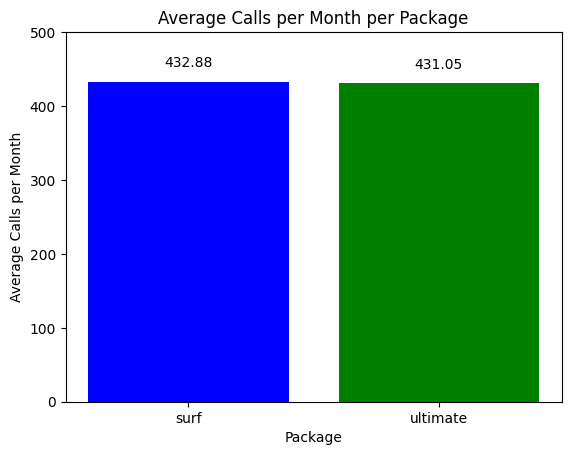

In [84]:
# Separate data for each packet
surf_data = user_stats[user_stats['plan'] == 'surf']
ultimate_data = user_stats[user_stats['plan'] == 'ultimate']

# Calculate the average call duration per month for each plan
avg_call_duration_surf = surf_data['call_minutes'].mean()
avg_call_duration_ultimate = ultimate_data['call_minutes'].mean()

# List of package names
packages = ['surf', 'ultimate']

# List of average call duration per month
avg_call_durations = [avg_call_duration_surf, avg_call_duration_ultimate]

# Create a bar chart
plt.bar(packages, avg_call_durations, color=['blue', 'green'])
plt.xlabel('Package')
plt.ylabel('Average Calls per Month')
plt.title('Average Calls per Month per Package')

# Set the maximum limit of the y-axis
plt.ylim(0, 500)

# Add a label with the average value above the bar
for i in range(len(packages)):
     plt.text(i, avg_call_durations[i] + 20, f'{avg_call_durations[i]:.2f}', ha='center')

plt.show()

In [85]:
# Compare the number of minutes users need for each package per month. Make a histogram.

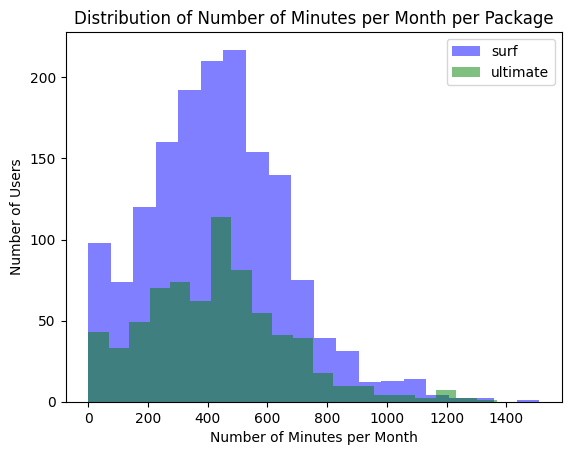

In [86]:
# Plot a histogram for each packet
plt.hist(surf_data['call_minutes'], alpha=0.5, label='surf', bins=20, color='blue')
plt.hist(ultimate_data['call_minutes'], alpha=0.5, label='ultimate', bins=20, color='green')

plt.xlabel('Number of Minutes per Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Minutes per Month per Package')
plt.legend()

plt.show()

In [87]:
# Calculate the average and variance of monthly call duration

In [88]:
# Calculate the average and variance of monthly call durations for Surf and Ultimate
var_surf_call_duration = surf_data['call_minutes'].var()
var_ultimate_call_duration = ultimate_data['call_minutes'].var()

print('Average monthly call duration for Surf plan:', avg_call_duration_surf)
print('Average monthly call duration for Ultimate plan:', avg_call_duration_ultimate)
print('\nMonthly call duration variance for Surf plan:', var_surf_call_duration)
print('Monthly call duration variance for Ultimate plan:', var_ultimate_call_duration)

Average monthly call duration for Surf plan: 432.87740693196406
Average monthly call duration for Ultimate plan: 431.0486787204451

Monthly call duration variance for Surf plan: 53709.82375383687
Monthly call duration variance for Ultimate plan: 57666.609047694685


<br>Based on the calculation of the average and variance of monthly call duration for Surf and Ultimate plans, we can make several conclusions:

<br>Average Monthly Call Duration:
<br>Surf Package: The average monthly call duration for Surf package users is approximately 432.88 minutes.
<br>Ultimate Package: The average monthly call duration for Ultimate package users is approximately 431.05 minutes.
    
<br>Monthly Call Duration Variance:
<br>Surf Package: The monthly call duration variance for Surf package users is approximately 53,709.82 minutes.
<br>Ultimate Package: The monthly call duration variance for Ultimate package users is approximately 57,666.61 minutes.
    
<br>Thus, based on the average monthly call duration, there does not appear to be any significant difference between Surf and Ultimate plan users. However, the higher variance in monthly call duration for the Ultimate plan suggests there is greater variation in monthly call usage for this plan.

In [89]:
# Create a boxplot graph to visualize the distribution of monthly call durations

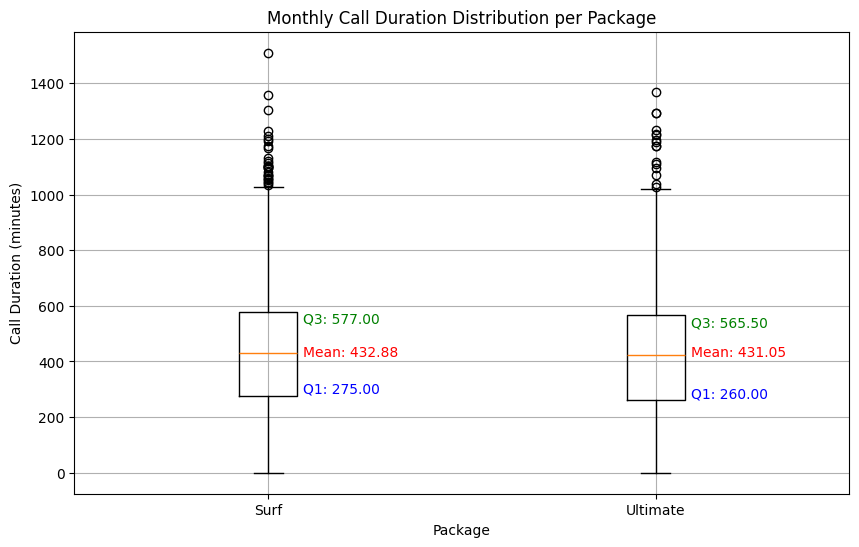

In [90]:
# Combine data for plotting
data_to_plot = [surf_data['call_minutes'], ultimate_data['call_minutes']]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Surf', 'Ultimate'])
plt.xlabel('Package')
plt.ylabel('Call Duration (minutes)')
plt.title('Monthly Call Duration Distribution per Package')
plt.grid(True)

# Add the Q1, Q3, and mean values to the boxplot box
for i, box_data in enumerate(data_to_plot):
     q1 = np.percentile(box_data, 25)
     q3 = np.percentile(box_data, 75)
     mean = np.mean(box_data)
    
     plt.text(i + 1, q1, f'        Q1: {q1:.2f}', ha='left', va='bottom', color='blue')
     plt.text(i + 1, q3, f'        Q3: {q3:.2f}', ha='left', va='top', color='green')
     plt.text(i + 1, mean, f'        Mean: {mean:.2f}', ha='left', va='center', color='red')


plt.show()

Conclusion

<br>Surf Package:
<br>Average monthly call duration: 432.88 minutes
<br>First Quartile (Q1): 275 minutes
<br>Third Quartile (Q3): 577 minutes
<br>Variance: 53,709.82

<br>Ultimate Package:
<br>Average monthly call duration: 431.05 minutes
<br>First Quartile (Q1): 260 minutes
<br>Third Quartile (Q3): 565.5 minutes
<br>Variance: 57,666.61

<br>Conclusion:
<br>From the analyzed data, the average monthly call duration between the Surf and Ultimate packages is quite close to each other. Data variability, as reflected by variance, is also similar between the two packages. However, the monthly call duration distribution on the Surf plan has slightly higher Q1 and Q3 compared to the Ultimate plan, although the difference is not significant.

<br>So, based on this data, there is no big difference in monthly call usage behavior between the Surf and Ultimate packages. However, the Surf plan has a slightly higher overall monthly call duration compared to the Ultimate plan.

[Back to Content](#back)

<a id='step3.3.2'></a>
### **3.3.2 Message/SMS**

In [91]:
# Compare the number of SMS users tend to send per plan per month

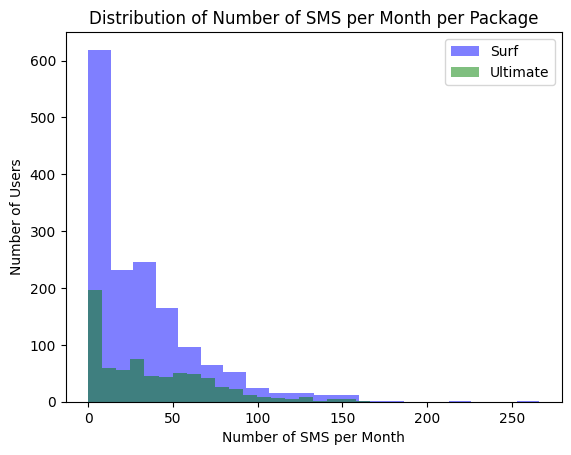

In [92]:
# Plot a histogram for each packet
plt.hist(surf_data['sms_per_month'], alpha=0.5, label='Surf', bins=20, color='blue')
plt.hist(ultimate_data['sms_per_month'], alpha=0.5, label='Ultimate', bins=20, color='green')

plt.xlabel('Number of SMS per Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of SMS per Month per Package')
plt.legend()

plt.show()

In [93]:
# Calculate the average number of SMS per month for each package
avg_sms_count_surf = surf_data['sms_per_month'].mean()
avg_sms_count_ultimate = ultimate_data['sms_per_month'].mean()

# Calculate the mean and variance of the monthly number of SMS for Surf and Ultimate
var_surf_sms_count = surf_data['sms_per_month'].var()
var_ultimate_sms_count = ultimate_data['sms_per_month'].var()

print('Average monthly number of SMS for Surf package:', avg_sms_count_surf)
print('Average monthly SMS count for Ultimate package:', avg_sms_count_ultimate)
print('\nMonthly SMS count variance for Surf plan:', var_surf_sms_count)
print('Monthly SMS count variance for Ultimate plan:', var_ultimate_sms_count)

Average monthly number of SMS for Surf package: 30.63992297817715
Average monthly SMS count for Ultimate package: 37.41029207232267

Monthly SMS count variance for Surf plan: 1130.4026954340122
Monthly SMS count variance for Ultimate plan: 1211.8244621708423


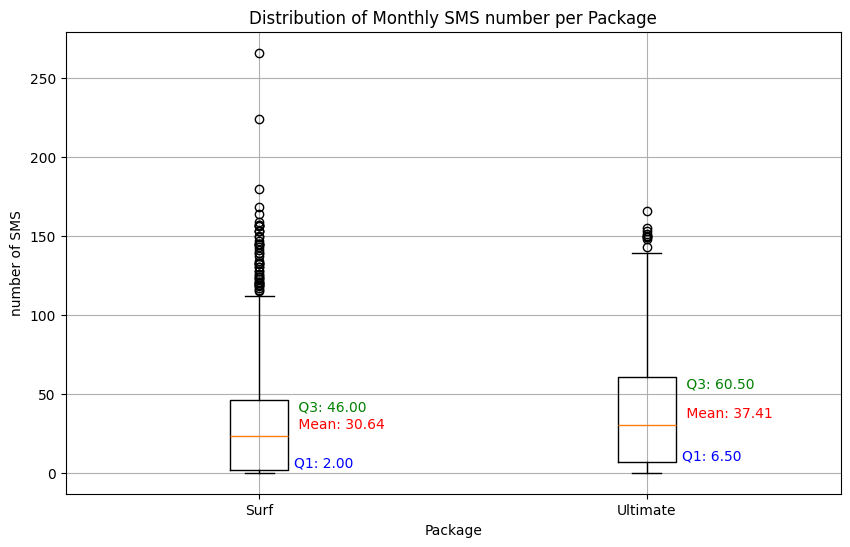

In [94]:
# Combine data for plotting
data_to_plot = [surf_data['sms_per_month'], ultimate_data['sms_per_month']]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Surf', 'Ultimate'])
plt.xlabel('Package')
plt.ylabel('number of SMS')
plt.title('Distribution of Monthly SMS number per Package')
plt.grid(True)

# Add the Q1, Q3, and mean values to the boxplot box
for i, box_data in enumerate(data_to_plot):
     q1 = np.percentile(box_data, 25)
     q3 = np.percentile(box_data, 75)
     mean = np.mean(box_data)
    
     plt.text(i + 1, q1, f'        Q1: {q1:.2f}', ha='left', va='bottom', color='blue')
     plt.text(i + 1, q3, f'         Q3: {q3:.2f}', ha='left', va='top', color='green')
     plt.text(i + 1, mean, f'         Mean: {mean:.2f}', ha='left', va='center', color='red')


plt.show()

<br>Based on the resulting data, we can formulate conclusions about how users tend to consume internet data packages for Surf and Ultimate packages:

<br>Average number of monthly SMS:
<br>The Surf plan has an average of around 30.64 SMS per month
<br>The Ultimate plan has an average of around 37.41 SMS per month

<br>Monthly SMS number variance:
<br>The variance for the number of monthly SMS on the Surf plan is around 1130.40
<br>The variance for the number of monthly SMS on the Ultimate package is around 1211.82

<br>Quartiles (Q1, Q3), and Mean:
<br>For the Surf package, Q1 (first quartile) is about 2 , Q3 (third quartile) is about 46 , and mean (average) is about 30.64
<br>For the Ultimate plan, Q1 is around 6.5 , Q3 is around 60.5 , and the mean is around 37.41

<br>Conclusion:

<br>Users of the Ultimate package tend to use more monthly SMS compared to users of the Surf package. This can be seen from the higher average on the Ultimate package. The variance that is almost the same between the two shows a quite significant variation in SMS usage.

<br>Quartiles show a more even distribution on the Surf plan, with most users having SMS volumes between Q1 and Q3. Meanwhile in the Ultimate package, the distribution is somewhat more spread out with higher values (outliers) so the median (Q2) is higher.

[Back to Content](#back)

<a id='step3.3.3'></a>
### **3.3.3 Internet** 

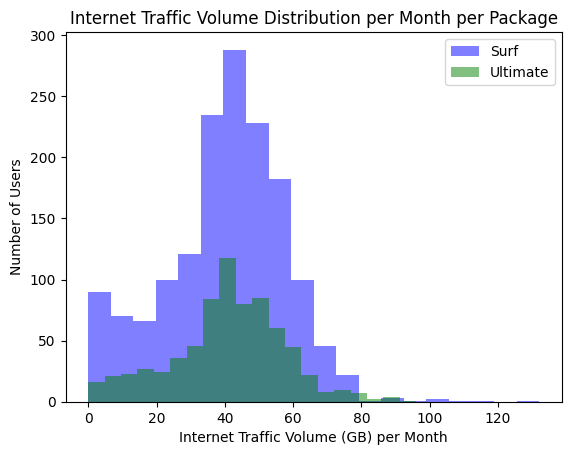

In [95]:
# Plot a histogram for each packet
plt.hist(surf_data['internet_gb_per_month'], alpha=0.5, label='Surf', bins=20, color='blue')
plt.hist(ultimate_data['internet_gb_per_month'], alpha=0.5, label='Ultimate', bins=20, color='green')

plt.xlabel('Internet Traffic Volume (GB) per Month')
plt.ylabel('Number of Users')
plt.title('Internet Traffic Volume Distribution per Month per Package')
plt.legend()

plt.show()

In [96]:
# Calculate the average number of data packages per month for each package
avg_gb_count_surf = surf_data['internet_gb_per_month'].mean()
avg_gb_count_ultimate = ultimate_data['internet_gb_per_month'].mean()

# Calculate the average and variance of the monthly data plan amounts for Surf and Ultimate
var_surf_gb_count = surf_data['internet_gb_per_month'].var()
var_ultimate_gb_count = ultimate_data['internet_gb_per_month'].var()

print('Average monthly data package count for Surf package:', avg_gb_count_surf)
print('Average monthly data package count for Ultimate package:', avg_gb_count_ultimate)
print('\nVariance of the number of monthly data packages for the Surf package:', var_surf_gb_count)
print('Variance in the number of monthly data packages for the Ultimate package:', var_ultimate_gb_count)

Average monthly data package count for Surf package: 39.83183568677792
Average monthly data package count for Ultimate package: 40.92350486787205

Variance of the number of monthly data packages for the Surf package: 322.0038156390082
Variance in the number of monthly data packages for the Ultimate package: 277.3882907628593


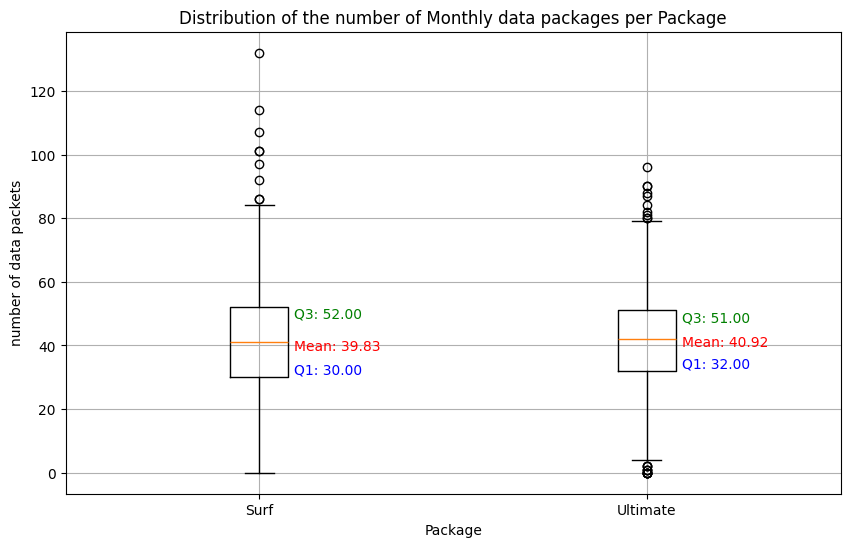

In [97]:
# Combine data for plotting
data_to_plot = [surf_data['internet_gb_per_month'], ultimate_data['internet_gb_per_month']]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Surf', 'Ultimate'])
plt.xlabel('Package')
plt.ylabel('number of data packets')
plt.title('Distribution of the number of Monthly data packages per Package')
plt.grid(True)

# Add the Q1, Q3, and mean values to the boxplot box
for i, box_data in enumerate(data_to_plot):
     q1 = np.percentile(box_data, 25)
     q3 = np.percentile(box_data, 75)
     mean = np.mean(box_data)
    
     plt.text(i + 1, q1, f'        Q1: {q1:.2f}', ha='left', va='bottom', color='blue')
     plt.text(i + 1, q3, f'        Q3: {q3:.2f}', ha='left', va='top', color='green')
     plt.text(i + 1, mean, f'        Mean: {mean:.2f}', ha='left', va='center', color='red')


plt.show()

<br>Based on the data provided, we can formulate conclusions about how users tend to consume internet data packages for Surf and Ultimate packages:

<br>Average monthly data package amount:
<br>Surf packages have an average of around 39.83 GB of data package per month
<br>The Ultimate package has an average of around 40.92 GB of data package per month

<br>Variance in the number of monthly data packages:
<br>The variance for the monthly data package amount on the Surf package is around 322.00
<br>The variance for the monthly data package amount on the Ultimate package is around 277.39

<br>Quartiles (Q1, Q3), and Mean:
<br>For the Surf package, Q1 (first quartile) is around 30 , Q3 (third quartile) is around 52 , and mean (average) is around 39.83
<br>For the Ultimate package, Q1 is around 32 , Q3 is around 51 , and the mean is around 40.92

<br>Conclusion:
<br>The average Ultimate plan user uses slightly more monthly data than Surf plan users, although the difference is quite small.
<br>The relatively low variance for both indicates that data package usage tends to be quite stable, with not too large variations between users on each package.
<br>The quartiles show that the majority of users on both plans had data plan usage between Q1 and Q3, with few outliers on both plans.
<br>User behavior in consuming internet data packages tends to be similar between Surf and Ultimate packages, with a slight tendency for Ultimate package users to use slightly more data packages compared to Surf package users. Variability in data package usage is also relatively stable in both packages.

[Back to Content](#back)

<a id='step3.3.4'></a>
### **3.3.4 Revenue** 

In [98]:
surf_revenue = surf_data['monthly_revenue']
ultimate_revenue = ultimate_data['monthly_revenue']

# Statistical description for the "Surf" package
surf_stats = surf_revenue.describe()

# Statistical description for the "Ultimate" package
ultimate_stats = ultimate_revenue.describe()

print("Monthly Income Statistics for Surf Package:")
print(surf_stats)

print("\nMonthly Income Statistics for Ultimate Package:")
print(ultimate_stats)

Monthly Income Statistics for Surf Package:
count    1558.000000
mean      280.175815
std       162.216058
min        20.000000
25%       171.692500
50%       290.000000
75%       390.000000
max      1210.370000
Name: monthly_revenue, dtype: float64

Monthly Income Statistics for Ultimate Package:
count    719.000000
mean     166.208623
std       86.986621
min       70.000000
25%       84.000000
50%      154.000000
75%      217.000000
max      532.000000
Name: monthly_revenue, dtype: float64


<br>Based on the monthly income statistics for the "Surf" and "Ultimate" packages, we can formulate several conclusions:

<br>Surf Package Monthly Income:
<br>The average monthly income for Surf plan users is around 280.16USD.
<br>The standard deviation of the Surf plan's monthly income is approximately 162.22USD, indicating a fairly large variation from the average.
<br>The minimum monthly income generated from the Surf package is 20USD, while the maximum income is 1210.37USD.
<br>Most Surf plan users (75&percnt;) have a monthly income below &dollar;390.

<br>Ultimate Package Monthly Income:
<br>The average monthly income for Ultimate plan users is approximately 166.21USD.
<br>The standard deviation of the Ultimate plan's monthly earnings is around 86.99USD, indicating lower variation compared to the Surf plan.
<br>The minimum monthly income generated from the Ultimate plan is 70USD, which is the cost of the plan.
<br>The maximum monthly revenue generated from the Ultimate plan is 532USD, indicating the potential for users to use additional services.
<br>Most Ultimate plan users (75&percnt;) have a monthly income below &dollar;217.

<br>Conclusion:
<br>The Surf plan has a higher average monthly income compared to the Ultimate plan, indicating that Surf plan users tend to generate higher income.
However, monthly income variability is higher on the Surf plan, meaning Surf plan users' income is more variable and can range from high to low income.
Ultimate plan users have more stable monthly income with less variability, but average income tends to be lower compared to the Surf plan.

[Back to Content](#back)

<a id='step4'></a>
# **Step 4. Hypothesis Testing**

In [99]:
# Test the hypothesis

In [100]:
# Separate revenue data for each package
surf_revenue = user_stats[user_stats['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = user_stats[user_stats['plan'] == 'ultimate']['monthly_revenue']

# Do a t-test
t_statistic, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue)

# Show test results
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

# Determine alpha (significance level)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
     print('We reject the null hypothesis: The average income of Ultimate and Surf package users is different.')
else:
     print('We fail to reject null hypothesis: There is insufficient evidence that the average income of Ultimate and Surf plan users is different.')

T-Statistic: 17.699468169100815
P-Value: 8.87761090528827e-66
We reject the null hypothesis: The average income of Ultimate and Surf package users is different.


<br>The t-test results show a t-statistical value of around 17.7 and a very low p-value, close to zero (8.87e-66), much smaller than the significance level (alpha) previously set (alpha = 0, 05). Therefore, we reject the null hypothesis that the average income of Ultimate and Surf package users is the same.

<br>Conclusion:
<br>Based on the t-test results, there is sufficient evidence to conclude that the average income of Ultimate and Surf package users is significantly different. Thus, there is a significant difference in the revenue generated by Ultimate and Surf plan users.

[Test the hypothesis that the average income of users in the NY-NJ area is different from the income of users from other areas.]

In [101]:
# Test the hypothesis

In [102]:
user_stats['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [103]:
# Separate data for the "NY-NJ" region and other regions
ny_nj_data = user_stats[user_stats['city'].str.contains('NY-NJ')]
other_data = user_stats[~user_stats['city'].str.contains('NY-NJ')]

# Check the data splitting results
ny_nj_data.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month,usd_monthly_pay,additional_cost_total,monthly_revenue
56,1014,Edmundo,Simon,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,December,150.0,1114.0,December,64.0,December,17.0,20,38.84,58.84
57,1014,Edmundo,Simon,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,November,28.0,163.0,November,9.0,November,2.0,20,0.00,20.00
75,1022,Bo,Snow,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,August,80.0,631.0,NaN,0.0,August,63.0,20,483.93,503.93
76,1022,Bo,Snow,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,December,82.0,585.0,NaN,0.0,December,60.0,20,452.55,472.55
77,1022,Bo,Snow,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,July,70.0,475.0,NaN,0.0,July,33.0,20,180.00,200.00


In [104]:
# Check the data splitting results
other_data.head()

,user_id,first_name,last_name,city,plan,call_month,calls_per_month,call_minutes,message_month,sms_per_month,session_month,internet_gb_per_month,usd_monthly_pay,additional_cost_total,monthly_revenue
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,December,16.0,124.0,December,11.0,December,4.0,70,0.00,70.00
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,August,27.0,182.0,August,30.0,August,21.0,20,60.00,80.00
2,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,December,56.0,412.0,December,44.0,December,55.0,20,400.00,420.00
3,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,November,64.0,426.0,November,36.0,November,49.0,20,340.00,360.00
4,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,October,65.0,393.0,October,53.0,October,50.0,20,350.09,370.09


In [105]:
# Calculate t-statistics and p-value
t_statistic, p_value = stats.ttest_ind(ny_nj_data['monthly_revenue'], other_data['monthly_revenue'])

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: 2.6203093127549453
P-Value: 0.008843440247478481


<br>The t-test results show a t-statistic value of around 2.62 and a p-value of around 0.0088. This p-value is smaller than the previously established significance level (alpha = 0.05), indicating that the difference in monthly income between users in New York/New Jersey (NY/NJ) and users outside NY/NJ is statistically significant.

<br>Conclusion:
<br>Based on the t-test results, we can conclude that there is a significant difference in monthly income between users in New York/New Jersey (NY/NJ) and users outside the area.

[Back to Content](#back)

<a id='step5'></a>
# **Step 5. General Conclusion** 

<br>Total USD Monthly Pay and Additional Fees:
<br>Total USD Monthly Pay for the Surf package is 31,160 USD, while for Ultimate it is 50,330 USD.
The total Additional Cost for the Surf package is around 405,353.92 USD, while for Ultimate it is around 69,174.00 USD.

<br>Monthly Call Duration:
<br>The average monthly call duration for the Surf package is around 432.88 minutes, while for the Ultimate package it is around 431.05 minutes.
The monthly call duration variance for the Surf package is around 53,709.82, while for the Ultimate package it is around 57,666.61.

<br>Number of Monthly SMS:
<br>The average number of monthly SMS for the Surf package is around 30.64 SMS, while for the Ultimate package it is around 37.41 SMS.
The variance in the number of monthly SMS for the Surf package is around 1,130.40, while for the Ultimate package it is around 1,211.82

<br>Number of Monthly Data Packages:
<br>The average monthly data package amount for the Surf package is around 39.83 GB, while for the Ultimate package it is around 40.92 GB.
The variance in monthly data package amounts for the Surf package is around 322.00, while for the Ultimate package it is around 277.39.

<br>Monthly Income Statistics:
<br>Monthly revenue statistics for the Surf package show a mean of around 276.78 USD with a standard deviation of around 162.24 USD.
Monthly revenue statistics for the Ultimate plan show a mean of around 140.18 USD with a standard deviation of around 78.06 USD.

<br>T-Test:
<br>The t-test results show that the difference in monthly income between Ultimate and Surf package users is statistically significant with a t-statistic value of around 17.7 and a very small p-value (8.87e-66).

<br>With these findings, we can conclude that there are significant differences in income and usage patterns between Surf and Ultimate plan users. The Ultimate plan has a lower average income compared to the Surf plan, but has higher additional costs. Additionally, the Ultimate plan tends to have a higher monthly call duration compared to the Surf plan.
    
<br>Package usage and preferences vary between users, and there are significant differences in income across regions. This information can be used for better marketing strategies and customization of service packages according to user needs.

[Back to Content](#back)